In [6]:
%matplotlib inline
import d2lzh as d2l
from mxnet import nd
from mxnet.gluon import loss as gloss

In [7]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [8]:
#hyper-parameters
num_inputs, num_outputs, num_hidden, num_hidden2 = 28 * 28, 10, 256, 100

W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hidden))
b1 = nd.zeros(num_hidden)
W2 = nd.random.normal(scale=0.01, shape=(num_hidden, num_hidden2))
b2 = nd.zeros(num_hidden2)
W3 = nd.random.normal(scale=0.01, shape=(num_hidden2, num_outputs))
b3 = nd.zeros(num_outputs)
params = [W1, b1, W2, b2]

for param in params:
    param.attach_grad()

In [9]:
def relu(X):
    return nd.maximum(X, 0)

def net(X):
    X = X.reshape((-1, num_inputs))
    H1 = relu(nd.dot(X, W1) + b1)
    H2 = relu(nd.dot(H1, W2) + b2)
    return nd.dot(H2, W3) + b3

loss = gloss.SoftmaxCrossEntropyLoss()

In [10]:
num_epochs, lr = 7, 0.5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 1.8005, train acc 0.374, test acc 0.631
epoch 2, loss 0.8973, train acc 0.667, test acc 0.695
epoch 3, loss 0.7426, train acc 0.718, test acc 0.735
epoch 4, loss 0.6685, train acc 0.758, test acc 0.769
epoch 5, loss 0.6156, train acc 0.779, test acc 0.792
epoch 6, loss 0.5795, train acc 0.796, test acc 0.800
epoch 7, loss 0.5523, train acc 0.808, test acc 0.815


shapes: 
X.shape (1, 28, 28), y.shape (1,)
predicted results: 

labels: 



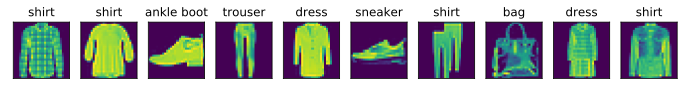

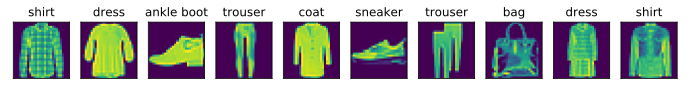

In [11]:
for X, y in train_iter:
    print(f'shapes: \nX.shape {X[0].shape}, y.shape {y[:1].shape}')
    print(f'predicted results: \n')
    d2l.show_fashion_mnist(X[:10], d2l.get_fashion_mnist_labels(net(X[:10]).argmax(axis=1).asnumpy()))
    print(f'labels: \n')
    d2l.show_fashion_mnist(X[:10], d2l.get_fashion_mnist_labels(y[:10].asnumpy()))
    break